#                                            WCVIP 2020, IIT Roorkee 

   ##                                            Dynamic Video Summarization:
## An overview of the typical video summarization system used for generating shorter videos as a summary of the given video.

### Contents:
1. Basic Video Operations
2. Typical components of a video summarization system
3. Video Segmentation
4. Features Extraction
5. Dynamic summarization
6. KTS Segmentation
7. Evaluation of Video Summaries

## Setup:

1. **Connect your GDrive with Colab using the following command.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #,force_remount=True)

Mounted at /content/drive


2. **Browse through the Google drive and change the working directory to that of the WCVIP folder.**

In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
#% cd ..
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
% cd ../..


/content/drive/My Drive


!wget http://download.blender.org/peach/bigbuckbunny_movies/big_buck_bunny_480p_surround-fix.avi

In [ ]:
!cd /content/drive/MyDrive/ILS-SUMM/datasets

In [ ]:
!dir

 Volume in drive G is New Volume
 Volume Serial Number is 7645-75B4

 Directory of G:\Gdrive\Colab Notebooks

12/13/2020  12:01 AM    <DIR>          .
12/13/2020  12:01 AM    <DIR>          ..
12/12/2020  08:58 PM    <DIR>          .ipynb_checkpoints
12/09/2020  09:32 PM            62,108 DRDSNColaboratory
12/13/2020  12:01 AM           100,041 ILS-SUMMColabNotebook.ipynb
12/12/2020  09:12 PM            67,139 WCVIP_Repo_Home.JPG
               3 File(s)        229,288 bytes
               3 Dir(s)  250,297,634,816 bytes free


## Basic Video Operations
https://zulko.github.io/moviepy/getting_started/efficient_moviepy.html

### Read a video and extract/ display its frames.

In [ ]:
import moviepy.editor as mpe
import os
#video = mpe.VideoFileClip('..\ILS-SUMM\data\Cosmus_Laundromat.mp4') #windows path
video = mpe.VideoFileClip('..'+os.sep+'ILS-SUMM'+os.sep+"data"+os.sep+"Cosmus_Laundromat.mp4")
np_frame = video.get_frame(2) # get the frame at t=2 seconds
#frame_number=2
#video_fps=video.fps

#np_frame = video.get_frame(frame_number * video_fps) # get frame by index
#video.save_frame('my_image.jpeg', t=23) # save frame at time, t=23 as JPEG
#video.save_frame('my_image.jpeg', t=int(frame_number/video_fps)) #get frame by its number


In [ ]:
np_frame.shape

(804, 1920, 3)


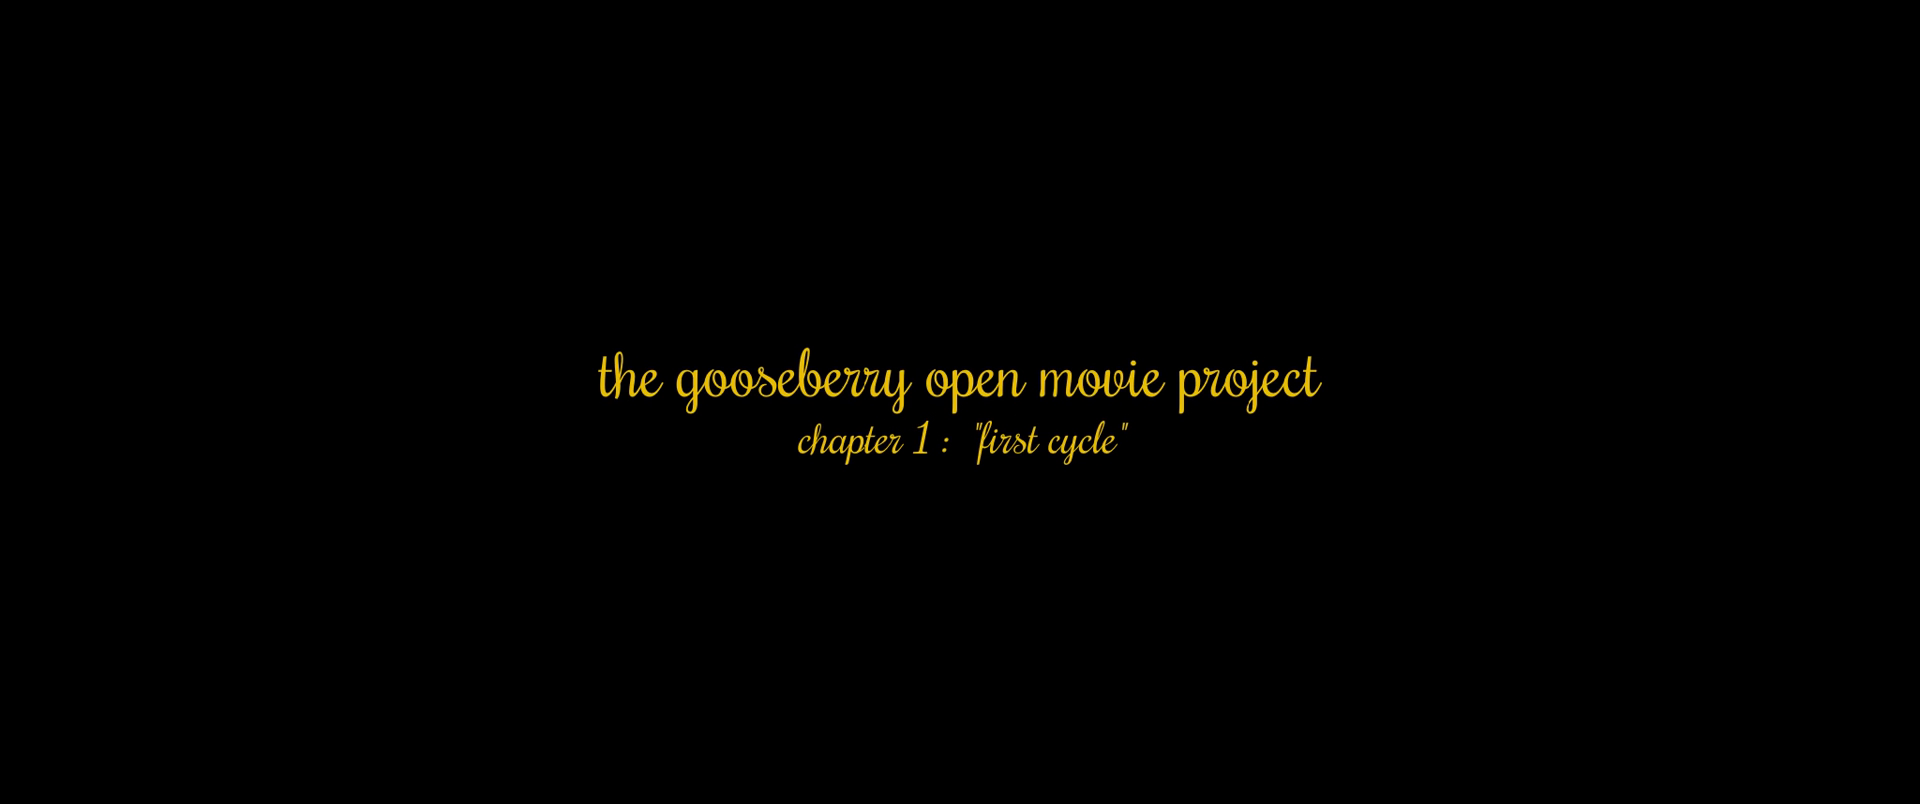

In [ ]:
video.ipython_display(t=15,width=400) # will display a snapshot at t=15s

#!pip install pygame
#video.ipython_display(fps=5)

#video.show() # shows the first frame of the clip
#my_clip.show(10.5) # shows the frame of the clip at t=10.5s
#video.show(10.5, interactive = True)
#my_clip.preview() # preview with default fps=15
#video.preview(fps=5)
#my_clip.preview(fps=15, audio=False) # don't generate/play the audio.

---

## Typical components of a video summarization system 
![DVSblockdiagram.pdf](DVSblockdiagram.jpg)


*For more details look into the recent survey paper [Vivekraj V. K., Debashis Sen, and Balasubramanian Raman. 2019. Video Skimming: Taxonomy and Comprehensive Survey. ACM Computing Surveys 52, 5, Article 106 (September 2019), 38 pages.](https://dl.acm.org/doi/10.1145/3347712)*

### Extracting part of the video.

Write a python function to extract 100 frames from the central portion of the given video.

In [ ]:
#import 
def extractVideoSubset(filepath):
    #read the video
    video = mpe.VideoFileClip('..'+os.sep+'ILS-SUMM'+os.sep+"data"+os.sep+"Cosmus_Laundromat.mp4")
    #video = mpe.VideoFileClip("G:\MIR\Machine Vision (Project MIR)\Presentations _ Reports\GUIAt1fps.mp4")
    #find the center frame of the video
    totFrames=video.duration*video.fps
    middleFrame=(totFrames/2)
    startTime=(middleFrame-50)/video.fps
    endTime=(middleFrame+50)/video.fps
    #choose the frame numbers i.e., 50 frames on either side of the center frame
    #subvideo=video.subclip(t_start=startTime,t_end=endTime)
    #write the selected frames to to a new file
    subvideo.write_videofile("my_animation.mp4", fps=24)
    # export as a GIF
    #subvideo=video.subclip(t_start=6,t_end=45)
    #subvideo.write_gif("GUIAt1fps.gif", fps=5) # usually slower
    
    return

#extractVideoSubset("Cosmus_Laundromat.mp4")

t:   0%|                                     | 0/195 [00:00<?, ?it/s, now=None]

MoviePy - Building file GUIAt1fps.gif with imageio.


### **Exercise:** 
A simple way to generate a video summary is by selecting a set of consecutive frames from the video at uniform intervals. Try to select a set of 10 frames at regular intervals from the video and create a summary video. The summary length should be 10% of the video length.

In [ ]:
#write your code here.

---
### Feature Extraction.

In [ ]:
from extractFeatures import extract_Histogram
import numpy as np

def videoFeatures(filepath):
    video = mpe.VideoFileClip('..'+os.sep+'ILS-SUMM'+os.sep+"data"+os.sep+"Cosmus_Laundromat.mp4")
    video_length=int(video.duration*video.fps)
    features=np.zeros(shape=(video_length,96),dtype=float)
    i=0
    for frame in video.iter_frames():
        features[i]=extract_Histogram(frame)
        i+=1
        if(i==video_length-1):
            break
    np.save(filepath.split('.')[-2]+'_features.npy', features)

videoFeatures("Cosmus_Laundromat.mp4")


In [ ]:
import numpy as np
feat=np.load('Cosmus_Laundromat_features.npy')
feat[500]

array([3.45613080e-01, 8.87709888e-02, 7.52539386e-02, 5.96457815e-02,
       4.16122512e-02, 3.43905473e-02, 4.20281405e-02, 6.20549596e-02,
       6.10243056e-02, 3.61266584e-02, 2.68345771e-02, 2.16029229e-02,
       1.48366242e-02, 1.07068823e-02, 9.03814262e-03, 6.61665630e-03,
       4.95245129e-03, 4.77495336e-03, 5.27959163e-03, 4.18674855e-03,
       3.66267620e-03, 3.49100850e-03, 3.01163454e-03, 2.80498549e-03,
       3.33747927e-03, 3.53246787e-03, 3.64065091e-03, 3.02977301e-03,
       2.92871580e-03, 2.51606551e-03, 3.28954187e-03, 9.40479892e-03,
       3.00847326e-01, 7.58985023e-02, 6.28478700e-02, 7.15945015e-02,
       6.83470667e-02, 4.99170813e-02, 3.75570066e-02, 4.11140910e-02,
       5.34009639e-02, 4.90399565e-02, 6.19202166e-02, 3.26589708e-02,
       1.66193771e-02, 1.18334111e-02, 6.25323901e-03, 4.86175891e-03,
       4.92070896e-03, 4.84750726e-03, 4.22043429e-03, 3.89458955e-03,
       3.39966833e-03, 3.29537210e-03, 3.96260883e-03, 4.27161070e-03,
      

In [ ]:
sht_dur=np.load('shots_durations.npy')
sht_dur.shape

(108,)

In [ ]:
sht_feat=np.load('shots_features.npy')
sht_feat.shape


In [ ]:
sht_feat[10]

array([0.18300231, 0.05707595, 0.03959888, 0.03945248, 0.06675542,
       0.09730385, 0.09483118, 0.07183613, 0.0330036 , 0.01654035,
       0.00854905, 0.00527052, 0.00815195, 0.06088827, 0.027301  ,
       0.03263824, 0.02091366, 0.02522155, 0.03656004, 0.02777778,
       0.02117796, 0.00961793, 0.00579136, 0.00336987, 0.00296629,
       0.002049  , 0.00113042, 0.00065946, 0.00037508, 0.00019045,
       0.        , 0.        , 0.13769758, 0.0432337 , 0.03696103,
       0.02498834, 0.01246308, 0.02236539, 0.05612951, 0.02108079,
       0.02321919, 0.02556424, 0.05785331, 0.08499236, 0.07886544,
       0.06932719, 0.06625207, 0.060348  , 0.04968258, 0.0230838 ,
       0.01827905, 0.0186768 , 0.01816503, 0.01371852, 0.00957776,
       0.00872914, 0.00586002, 0.00351563, 0.00277389, 0.00205872,
       0.00176526, 0.00128718, 0.00076117, 0.00072424, 0.14506569,
       0.05553936, 0.030277  , 0.01842351, 0.02432629, 0.05162858,
       0.01937254, 0.02067916, 0.03581183, 0.0644311 , 0.05890

### Video Segmentation.

In [ ]:
# %load ffprob_shot_segmentation.py

In [ ]:
#windows
video_path='../../data'
video_name='Cosmus_Laundromat.mp4'
shot_seg_text_file = os.path.join(video_path,video_name.split(".")[-2]+'_shot_segmentation.txt')
#print(shot_seg_text_file)
command = 'ffprobe -show_frames -of compact=p=0 -f lavfi "movie=' +video_path+'/'+video_name + ',select=gt(scene\,.4)" > ' + shot_seg_text_file 
print(command)
#subprocess.call(command, shell=True)
proc = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
proc.communicate()
print("Finished ffmpeg shot segmentation")

**FFmpeg** is a free and open-source software project consisting of a large suite of libraries and programs for handling video, audio, and other multimedia files and streams. Video player are built using this library. For more details see [FFMPEG](https://ffmpeg.org/) 

**ffprobe** gathers information from multimedia streams and prints it in human- and machine-readable fashion. For example it can be used to check the format of the container used by a multimedia stream and the format and type of each media stream contained in it. For more details see [ffprobe](https://ffmpeg.org/ffprobe.html)

In [ ]:
print("Reading shot seg text file")
with open(shot_seg_text_file) as f:
    content = f.readlines()
shotIdx = [0]
frames_per_second = getFramerate(os.path.join(video_path,video_name))
i = 0
for line in content:
    shotIdx.append(np.int(np.round(float(line.split(sep="pkt_pts_time=")[1].split(sep="|pkt_dts")[0]) * frames_per_second)))
    i = i + 1

In [ ]:
for x in range(1,len(shotIdx)):
    print(shotIdx[x]-shotIdx[x-1]) 

In [ ]:
# Impose a minimum (Lmin) and maximum (Lmax) shot length:
Lmin = 25
Lmax = 200
cap = cv2.VideoCapture(os.path.join(video_path, video_name))
total_num_of_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
C = np.subtract(np.append(shotIdx[1:], total_num_of_frames), shotIdx)
# Consolidate a short shot with the following shot:
C_without_short_shots = []
for i in range(len(C) - 1):
    if C[i] >= Lmin:
        C_without_short_shots.append(C[i])
    else:
        C[i+1] = C[i+1] + C[i]
if C[-1] >= Lmin:
    C_without_short_shots.append(C[-1])
else:
    C_without_short_shots[-1] += C[-1]
# Break long shot into smaller parts:
final_C = []
for i in range(len(C_without_short_shots)):
    if C_without_short_shots[i] <= Lmax:
        final_C.append(C_without_short_shots[i])
    else:
        devide_factor = np.int((C_without_short_shots[i] // Lmax) + 1)
        length_of_each_part = C_without_short_shots[i] // devide_factor
        for j in range(devide_factor - 1):
            final_C.append(length_of_each_part)
        final_C.append( C_without_short_shots[i] - (devide_factor - 1)*length_of_each_part )
final_C    

In [ ]:
#!ffprobe -show_frames -of compact=p=0 -f lavfi "movie=./videos/Cosmus_Laundromat.mp4,select=gt(scene\,.4)" > ".\\videos\\shot_seg_mos.txt"

In [1]:
!ffprobe

ffprobe version 3.4.8-0ubuntu0.2 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

### Dynamic Video Sumarization

*For details see this paper [Yair Shemer, Daniel Rotman, and Nahum Shimkin 2020. ILS-SUMM: Iterated Local Search for Unsupervised Video Summarization](https://arxiv.org/abs/1912.03650v1)*

Also see [this](https://github.com/YairShemer/ILS-SUMM) Github repository for more detailed codes.

**Steps**

---
1. Input video $v$ is segmented into shots $S_v={s_1, s_2, s_3, ..., s_N}$ where $N$ is the number of shots.
2. Each shot is represented by the middle frame feature vector $x(s)$
3. Summarization is considered as an optimization problem where in a representative subset of shot $S_{summ} \subset S_v$ are selected as its summary. Total Distance (TD) is used as the cost function, which is formulated as 
![TDformula](TDformula.jpg) 
            such that             
![TDminimize](TDminimize.jpg) 
            subject to            
![TDminCriteria](TDminCriteria.jpg)             
where $dist(x, y)$ denotes some distance metric between $x$ and $y$, and $T$ is the maximum total duration in seconds allowed for the video summary.
4. LOCAL-SEARCH-SUMM: Takes $S_{init}$ as initial set of shot/ shots. In each iteration, it selects the neighbour of the current solution and moves to this neighbour if it decreases the cost function (TD) or adds another shot to the set if it decreases the cost function. The loop executes unitl $MAX\_TRIALS$ (predefined number of trials is reached).
5. ILS-SUMM: Calls LOCAL-SEARCH-SUMM to check where the achieved solution is not a a global minima.
    - Pertubation: Swaps certain $M$ shots in $S^*$ with those shots that are not currently in $S^*$
    - LOCAL-SEARCH-SUMM: as in step 4
    - Acceptance criterion: Takes a decision on whether to consider the newly found set of shots or to stay with the old set of shots.
    
---


In [ ]:
# %load ILSSUMMdemo.py
import numpy as np
import os
import sys
from ILS_SUMM import ILS_SUMM
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip, concatenate_videoclips

def demo(video_name='Cosmus_Laundromat.mp4', summ_ratio=0.1):
    SUMM_RATIO = 0.1  # The maximum allowed ratio between the summary video and the full video.
    VIDEO_NAME = 'Cosmos_Laundromat.mp4'

    # Load data:
    X = np.load(os.path.join('data', 'shots_features.npy'))  # Load n x d feature matrix. n - number of shots, d - feature dimension.
    C = np.load(os.path.join('data', 'shots_durations.npy'))  # Load n x 1 shots duration array (number of frames per shot).

    # Calculate allowed budget
    budget = float(summ_ratio) * np.sum(C)

    # Use ILS_SUMM to obtain a representative subset which satisfies the knapsack constraint.
    representative_points, total_distance = ILS_SUMM(X, C, budget)

    # Display Results:
    representative_points = np.sort(representative_points)
    print("The selected shots are: " + str(representative_points))
    print("The achieved total distance is: " +str(np.round(total_distance,3)))
    u, s, vh = np.linalg.svd(X)
    plt.figure()
    point_size = np.divide(C, np.max(C)) * 100
    plt.scatter(u[:, 1], u[:, 2], s=point_size, c='lawngreen', marker='o')
    plt.scatter(u[representative_points, 1], u[representative_points, 2], s=point_size[representative_points],
                c='blue', marker='o')
    plt.title('Solution Visualization (total distance = ' + str(total_distance) + ')')
    plt.savefig(os.path.join('data', 'Solution_Visualization'))

    # Generate the video summary file
    video_file_path = os.path.join('data', video_name)
    video_clip = VideoFileClip(video_file_path)
    shotIdx = np.concatenate(([0], np.cumsum(C[:-1])))
    frames_per_seconds = np.sum(C)/ video_clip.duration
    chosen_shots_clips = []
    for i in range(len(representative_points)):
        curr_start_time = shotIdx[representative_points[i]] / frames_per_seconds  # [Sec]
        if representative_points[i] == (shotIdx.__len__() - 1):
            curr_end_time = video_clip.duration
        else:
            curr_end_time = (shotIdx[representative_points[i] + 1] - 1) / frames_per_seconds  # [Sec]
        chosen_shots_clips.append(VideoFileClip(video_file_path).subclip(curr_start_time, curr_end_time))
    if chosen_shots_clips == []:
        print("The length of the shortest shots exceeds the allotted summarization time")
    else:
        summ_clip = concatenate_videoclips(chosen_shots_clips)

        summ_clip.write_videofile(os.path.join('data', "video_summary.mp4"))

#if __name__ == "__main__":
#    demo(sys.argv[1],float(sys.argv[2]))
#call demo()


---
### **You can try video summarization on [SumMe](https://gyglim.github.io/me/vsum/index.html#benchmark) Dataset.**
For more details please refer [Gygli, M., Grabner, H., Riemenschneider, H. and Van Gool, L., 2014, September. Creating summaries from user videos. In European conference on computer vision (pp. 505-520). Springer, Cham.](https://gyglim.github.io/me/papers/GygliECCV14_vsum.pdf)

### KTS Segmentation

For more details please refer to [Potapov D., Douze M., Harchaoui Z., Schmid C. (2014) Category-Specific Video Summarization. Computer Vision – ECCV 2014. ECCV 2014. Lecture Notes in Computer Science, vol 8694. Springer, Cham.](https://link.springer.com/chapter/10.1007/978-3-319-10599-4_35)

#use KTSSegmentation.ipynb

---
### Evaluation of Video Summaries

In [ ]:
!dir

 Volume in drive G is New Volume
 Volume Serial Number is 7645-75B4

 Directory of G:\Gdrive\Colab Notebooks

12/17/2020  10:49 PM    <DIR>          .
12/17/2020  10:49 PM    <DIR>          ..
12/15/2020  03:26 AM    <DIR>          .ipynb_checkpoints
12/09/2020  10:11 PM             6,434 auxiliary_functions.py
12/14/2020  12:55 AM        13,466,240 Cosmus_Laundromat_features.npy
12/09/2020  09:32 PM            62,108 DRDSNColaboratory
12/15/2020  04:40 PM            80,548 DVSblockdiagram.jpg
12/17/2020  10:49 PM           132,167 DVSWorkshopColabNotebook.ipynb
12/13/2020  10:40 PM             1,469 extractFeatures.py
12/09/2020  10:11 PM             2,986 ffprob_shot_segmentation.py
12/15/2020  11:31 PM             2,749 ILSSUMMdemo.py
12/09/2020  10:11 PM             8,889 ILS_SUMM.py
12/15/2020  03:08 AM    <DIR>          kts
12/13/2020  10:18 PM         1,293,715 my_animation.mp4
05/16/2014  11:00 AM             5,104 summe.py
05/16/2014  10:58 AM             1,935 SumMeDVSdemo.py

In [ ]:
import numpy as np

In [ ]:
dummysummary=np.zeros(950)
dummysummary[200:250]=15
dummysummary[300:350]=19
len(dummysummary)
#(dummysummary+dummysummary)
#entries=np.nonzero(dummysummary)
#len(entries[0])
#entries

950

In [ ]:
sum((map(lambda x: (1 if x>0 else 0),dummysummary+dummysummary)))

100

In [ ]:
summary_indicator

In [ ]:
from summe import evaluateSummary
fmea, sumlength = evaluateSummary(dummysummary,"Jumps","./HOMEDATA")

In [ ]:
sumlength, fmea

(0.10526315789473684, array([0.47042707]))

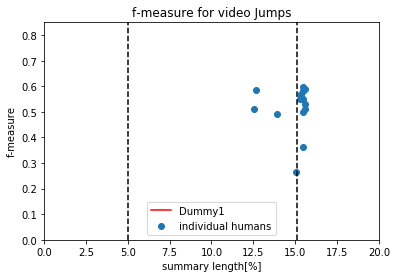

In [ ]:
from summe import plotAllResults
plotAllResults(dummysummary,["Dummy1"],"Jumps","./HOMEDATA")

In [ ]:
# %load summe.py
'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%% Demo for the evaluation of video summaries
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% Package to evaluate and plot summarization results
% on the SumMe dataset
%
%%%%%%%%
% publication: Gygli et al. - Creating Summaries from User Videos, ECCV 2014
% author:      Michael Gygli, PhD student, ETH Zurich,
% mail:        gygli@vision.ee.ethz.ch
% date:        05-16-2014
'''
import scipy.io
import warnings
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def evaluateSummary(summary_selection,videoName,HOMEDATA):
     '''Evaluates a summary for video videoName (where HOMEDATA points to the ground truth file)   
     f_measure is the mean pairwise f-measure used in Gygli et al. ECCV 2013 
     NOTE: This is only a minimal version of the matlab script'''
     # Load GT file
     gt_file = HOMEDATA+'/'+videoName+'.mat'
     gt_data = scipy.io.loadmat(gt_file)
     
     user_score=gt_data.get('user_score');
     nFrames=user_score.shape[0];
     nbOfUsers=user_score.shape[1];
    
     # Check inputs
     if len(summary_selection) < nFrames:
          warnings.warn('Pad selection with %d zeros!' % (nFrames-len(summary_selection)))
          summary_selection.extend(np.zeros(nFrames-len(summary_selection)))

     elif len(summary_selection) > nFrames:
          warnings.warn('Crop selection (%d frames) to GT length' %(len(summary_selection)-nFrames))       
          summary_selection=summary_selection[0:nFrames];
             
     
     # Compute pairwise f-measure, summary length and recall
     summary_indicator=np.array(map(lambda x: (1 if x>0 else 0),summary_selection));    
     user_intersection=np.zeros((nbOfUsers,1));
     user_union=np.zeros((nbOfUsers,1));
     user_length=np.zeros((nbOfUsers,1));
     for userIdx in range(0,nbOfUsers):
         gt_indicator=np.array(map(lambda x: (1 if x>0 else 0),user_score[:,userIdx]))
         
         user_intersection[userIdx]=np.sum(gt_indicator*summary_indicator);
         user_union[userIdx]=sum(np.array(map(lambda x: (1 if x>0 else 0),gt_indicator + summary_indicator)));         
                  
         user_length[userIdx]=sum(gt_indicator)
    
     recall=user_intersection/user_length;
     p=user_intersection/np.sum(summary_indicator);

     f_measure=[]
     for idx in range(0,len(p)):
          if p[idx]>0 or recall[idx]>0:
               f_measure.append(2*recall[idx]*p[idx]/(recall[idx]+p[idx]))
          else:
               f_measure.append(0)
     nn_f_meas=np.max(f_measure);
     f_measure=np.mean(f_measure);
    
     nnz_idx=np.nonzero(summary_selection)
     nbNNZ=len(nnz_idx[0])
         
     summary_length=float(nbNNZ)/float(len(summary_selection));
       
     recall=np.mean(recall);
     p=np.mean(p);
     
     return f_measure, summary_length

In [ ]:
def plotAllResults(summary_selections,methods,videoName,HOMEDATA):
    '''Evaluates a summary for video videoName and plots the results
      (where HOMEDATA points to the ground truth file) 
      NOTE: This is only a minimal version of the matlab script'''
    
    # Get GT data
    gt_file=HOMEDATA+'/'+videoName+'.mat'
    gt_data = scipy.io.loadmat(gt_file)
    user_score=gt_data.get('user_score')
    nFrames=user_score.shape[0];
    nbOfUsers=user_score.shape[1];    

    ''' Get automated summary score for all methods '''
    automated_fmeasure={};
    automated_length={};
    for methodIdx in range(0,len(methods)):
        summaryIndices=np.sort(np.unique(summary_selections[methodIdx]))
        automated_fmeasure[methodIdx]=np.zeros(len(summaryIndices));
        automated_length[methodIdx]=np.zeros(len(summaryIndices));
        idx=0
        for selIdx in summaryIndices:
            if selIdx>0:
                curSummary=np.array(map(lambda x: (1 if x>=selIdx else 0),summary_selections[methodIdx]))    
                f_m, s_l = evaluateSummary(curSummary,videoName,HOMEDATA)
                automated_fmeasure[methodIdx][idx]=f_m
                automated_length[methodIdx][idx]=s_l
                idx=idx+1

    
    ''' Compute human score '''
    human_f_measures=np.zeros(nbOfUsers)
    human_summary_length=np.zeros(nbOfUsers)
    for userIdx in range(0, nbOfUsers):
        human_f_measures[userIdx], human_summary_length[userIdx] = evaluateSummary(user_score[:,userIdx],videoName,HOMEDATA);

    avg_human_f=np.mean(human_f_measures)
    avg_human_len=np.mean(human_summary_length)
    

    ''' Plot results'''
    fig = plt.figure()
    p1=plt.scatter(100*human_summary_length,human_f_measures)
    colors=['r','g','m','c','y']
    for methodIdx in range(0,len(methods)):
        p2=plt.plot(100*automated_length[methodIdx],automated_fmeasure[methodIdx],'-'+colors[methodIdx])
        
    plt.xlabel('summary length[%]')
    plt.ylabel('f-measure')
    plt.title('f-measure for video '+videoName)
    legend=list(methods)    
    legend.extend(['individual humans'])
    plt.legend(legend)
    plt.ylim([0,0.85])
    plt.xlim([0,20])
    plt.plot([5, 5],[0, 1],'--k')
    plt.plot([15.1, 15.1],[ 0, 1],'--k')
    plt.show()

### Create random summaries and visualize the performance on SumMe dataset.

F-measure : 0.136 at length 0.15


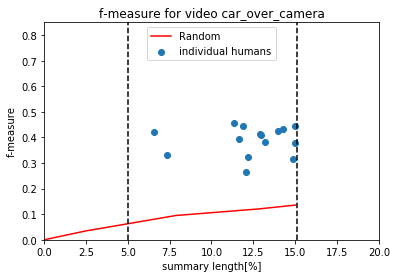

In [ ]:
# %load SumMeDVSdemo.py
#!/usr/bin/env python
'''
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%% Demo for the evaluation of video summaries
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% This script takes a random video, selects a random summary
% Then, it evaluates the summary and plots the performance compared to the human summaries
%
%%%%%%%%
% publication: Gygli et al. - Creating Summaries from User Videos, ECCV 2014
% author:      Michael Gygli, PhD student, ETH Zurich,
% mail:        gygli@vision.ee.ethz.ch
% date:        05-16-2014
'''
import os 
from summe import *
import numpy as np
import random
''' PATHS ''' 
HOMEDATA='HOMEDATA/';
HOMEVIDEOS='videos/';

if __name__ == "__main__":
    # Take a random video and create a random summary for it
    included_extenstions=['mp4']
    videoList=[fn for fn in os.listdir(HOMEVIDEOS) if any([fn.endswith(ext) for ext in included_extenstions])]
    #videoName = videoList[int(round(random.random()*7))]
    videoName = videoList[0]
    videoName=videoName.split('.')[0]                                    
    
    #In this example we need to do this to now how long the summary selection needs to be
    gt_file=HOMEDATA+'/'+videoName+'.mat'
    gt_data = scipy.io.loadmat(gt_file)
    nFrames=gt_data.get('nFrames')
    
    '''Example summary vector''' 
    #selected frames set to n (where n is the rank of selection) and the rest to 0
    summary_selections={};
    summary_selections[0]=np.random.random(nFrames[0][0])*20;
    summary_selections[0]=list(map(lambda q: (round(q) if (q >= np.percentile(summary_selections[0],85)) else 0),summary_selections[0]))
    
    '''Evaluate'''
    #get f-measure at 15% summary length
    [f_measure,summary_length]=evaluateSummary(summary_selections[0],videoName,HOMEDATA)
    print('F-measure : %.3f at length %.2f' % (f_measure, summary_length))
    
    '''plotting'''
    methodNames={'Random'};
    plotAllResults(summary_selections,methodNames,videoName,HOMEDATA);


In [ ]:
videoList

['car_over_camera.mp4',
 'Cosmus_Laundromat.mp4',
 'Fire Domino.mp4',
 'Jumps.mp4',
 'sintel.mp4',
 'St Maarten Landing.mp4',
 'Star Wreck.mp4']

In [ ]:
summaryIndices=np.sort(np.unique(summary_selections[0]))
summaryIndices

array([ 0, 17, 18, 19, 20])

In [ ]:
curSummary=list(map(lambda x: (1 if x>=20 else 0),summary_selections[0]))
curSummary.count(1)

96

### More Summarization

Check this paper [Zhou, K., Qiao, Y. and Xiang, T., 2017. Deep reinforcement learning for unsupervised video summarization with diversity-representativeness reward. In Thirty-Second AAAI Conference on Artificial Intelligence.](https://arxiv.org/pdf/1801.00054)

Github repository for code is [here](https://github.com/KaiyangZhou/vsumm-reinforce).

---
> This workbook will be available in [this](https://github.com/vivekrajvk/WCVIP2020) repository. For any questions please contact vk@cs.iitr.ac.in.

---